<a href="https://colab.research.google.com/github/bdunn20/book_code/blob/main/python_automation_cookbook/Ch3_Building_Your_First_Web_Scraping_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading Web Pages

In [1]:
import requests

url = 'http://www.columbia.edu/~fdc/sample.html'
response = requests.get(url)

# check returned object status code
response.status_code

200

In [2]:
# check content of result
response.text

'<!DOCTYPE HTML>\n<html lang="en">\n<head>\n<!-- THIS IS A COMMENT -->\n<title>Sample Web Page</title>\n<META charset="utf-8">\n<META name="viewport"\n content="width=device-width, initial-scale=1.0">\n<style>\nblockquote { margin-left:20px; margin-right:5px }\npre { overflow-x:auto }\n.tt { font-family:monospace }\n.nowrap { white-space:nowrap }\n.example { font-family:monospace; white-space:pre; overflow-x:auto; }\nh3 { border-top:1px solid grey }\nblockquote { margin-top:0; margin-bottom:0 }\ntable.compact { border-collapse:collapse }\ntable.compact th { text-align:left; background:#eeeeee }\ntable.compact td,th { padding:0 4px 0 8px; border:1px solid grey }\n</style>\n</head>\n\n<body style="width:96%; max-width:720px">\n\n<h2>Do-It-Yourself Web Authoring - a beginner\'s HTML tutorial</h2>\n<!-- How to insert an image -->\n<img\n alt="Sample image" \n title="title=&#34;Text to show when mouse is hovered over this image&#34;"\n src="picture-of-something.jpg"\n style="width:100%;">\n

In [3]:
# check ongoing and returned headers
response.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [4]:
response.headers

{'Date': 'Fri, 05 Jan 2024 15:20:30 GMT', 'Server': 'Apache', 'Last-Modified': 'Fri, 17 Sep 2021 19:26:14 GMT', 'Accept-Ranges': 'bytes', 'Vary': 'Accept-Encoding,User-Agent', 'Content-Encoding': 'gzip', 'Content-Length': '12038', 'Keep-Alive': 'timeout=15, max=93', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html', 'Set-Cookie': 'BIGipServer~CUIT~www.columbia.edu-80-pool=!a5Fj4UMbkMFKIOGxkMB4dfad9xLUYBJOhSuOeii3edmvDSRxAOKpxJeP1+KT6K3aV6W1PYDbGyhy7Rw=; expires=Fri, 05-Jan-2024 21:20:30 GMT; path=/; Httponly'}

## Parsing HTML

In [5]:
import requests
from bs4 import BeautifulSoup

In [6]:
URL = 'http://www.columbia.edu/~fdc/sample.html'
response = requests.get(URL)
response

<Response [200]>

In [8]:
# parse the downloaded page
page = BeautifulSoup(response.text, 'html.parser')

# obtain the title of the page
page.title

<title>Sample Web Page</title>

In [9]:
# confirm it is the same as is displayed in the browser
page.title.string

'Sample Web Page'

In [10]:
# find all h3 elements in the page to determine existing sections
page.find_all('h3')

[<h3 id="contents">CONTENTS</h3>,
 <h3 id="basics">1. Creating a Web Page</h3>,
 <h3 id="syntax">2. HTML Syntax</h3>,
 <h3 id="chars">3. Special Characters</h3>,
 <h3 id="convert">4. Converting Plain Text to HTML</h3>,
 <h3 id="effects">5. Effects</h3>,
 <h3 id="lists">6. Lists</h3>,
 <h3 id="links">7. Links</h3>,
 <h3 id="tables">8. Tables</h3>,
 <h3 id="viewing">9. Viewing Your Web Page</h3>,
 <h3 id="install">10. Installing Your Web Page on the Internet</h3>,
 <h3 id="more">11. Where to go from here</h3>,
 <h3 id="fluid">12. Postscript: Cell Phones</h3>]

In [11]:
# extract text on the section Special Characters stopping when you reach the next h3 tag
link_section = page.find('h3', attrs={'id' : 'chars'})
section = []
for element in link_section.next_elements:
  if element.name == 'h3':
    break
  section.append(element.string or '')

result = ''.join(section)
result

'3. Special Characters\n\nHTML special "character entities" start with ampersand (&&) and\nend with semicolon (;;), like "&euro;&euro;" = "€".  The\never-popular "no-break space" is &nbsp;&nbsp;.  There are special\nentity names for accented Latin letters and other West European special\ncharacters such as:\n\n\n\n\n\n\n&auml;&auml;\na-umlaut\n\xa0ä\xa0\n\n\n&Auml;&Auml;\nA-umlaut \n\xa0Ä\xa0\n\n\n&aacute;&aacute;\na-acute \n\xa0á\xa0\n\n\n&agrave;&agrave;\na-grave \n\xa0à\xa0\n\n\n&ntilde;&ntilde;\nn-tilde \n\xa0ñ\xa0\n\n\n&szlig;&szlig;\nGerman double-s\n\xa0ß\xa0\n\n\n&thorn;&thorn;\nIcelandic thorn \n\xa0þ\xa0\n\xa0þ\xa0\n\n\n\n\n\n(The table above is shown in the basic, default style of HTML.  Of course\nthere are many ways to customize the appearance of tables; more\nabout this belowbelow.\n\n\n\nExamples:\n\n\nFor SpanishSpanish you would need:\n&Aacute;&Aacute; (Á),\n&aacute;&aacute; (á),\n&Eacute;&Eacute; (É),\n&eacute;&eacute; (é),\n&Iacute;&Iacute; (Í),\n&iacute;&iacute; (í)

Note that all the raw text is displayed w/o including the enclosing HTML tags.

In [13]:
# regexes can be used as input in the .find() and .find_all() methods
# example below search uses the h2 and h3 tags
import re
page.find_all(re.compile('^h(2|3)'))

[<h2>Do-It-Yourself Web Authoring - a beginner's HTML tutorial</h2>,
 <h3 id="contents">CONTENTS</h3>,
 <h3 id="basics">1. Creating a Web Page</h3>,
 <h3 id="syntax">2. HTML Syntax</h3>,
 <h3 id="chars">3. Special Characters</h3>,
 <h3 id="convert">4. Converting Plain Text to HTML</h3>,
 <h3 id="effects">5. Effects</h3>,
 <h3 id="lists">6. Lists</h3>,
 <h3 id="links">7. Links</h3>,
 <h3 id="tables">8. Tables</h3>,
 <h3 id="viewing">9. Viewing Your Web Page</h3>,
 <h3 id="install">10. Installing Your Web Page on the Internet</h3>,
 <h3 id="more">11. Where to go from here</h3>,
 <h3 id="fluid">12. Postscript: Cell Phones</h3>]

## Crawling the Web


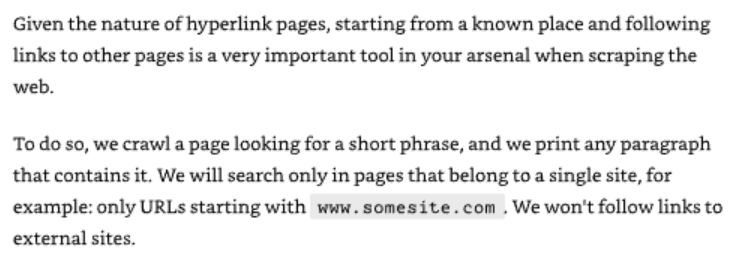